# sspike basic usage

## Imports

- `pnut`: process neutrino underground telemetry.
- `beer`: back-end event reader.
- `Supernova`: simulation and progenitor specifics.
- `Detector`: detector specifics.

In [1]:
from sspike import pnut, beer
from sspike.supernova import Supernova
from sspike.detectors import Detector

## Supernova parameters

- `model`: current options are `Fornax_2021`, `Kuroda_2020`, `Nakazato_2013`, `Sukhbold_2015`, `Tamborra_2014`, `Walk_2018`, `Walk_2019`, `Warren_2020`.
- `progenitor`: see notebooks or documentation for specifics on each model and references.
- `transformation`: snewpy transformation type.  Current options: `NoTransformation`, "AdiabaticMSW_IMO", "AdiabaticMSW_NMO"
- `distance`: distance to supernova in kpc.

In [2]:
model = 'Nakazato_2013'
progenitor = {'mass': 20,
              'metal': 0.02,
              't_rev': 300}
transformation = 'NoTransformation'
distance = 10.0

## Initialize classes

- `Detector` must be in `SNOwGLoBES` and `snewpy`.

In [3]:
detector = Detector('kamland')
sn = Supernova(model, progenitor, transformation, distance)

## Luminosity

Get luminosity as a pandas DataFrame with `pnut` or plot with `beer`.

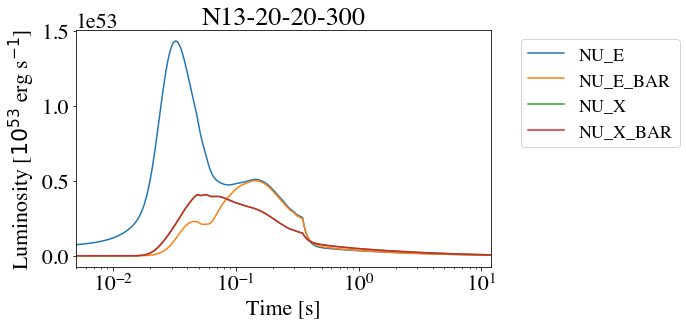

In [4]:
# lum = pnut.get_luminosities(sn)
beer.plot_luminosities(sn)

## Fluences

Get model fluxes scaled by distance and integrated over time.

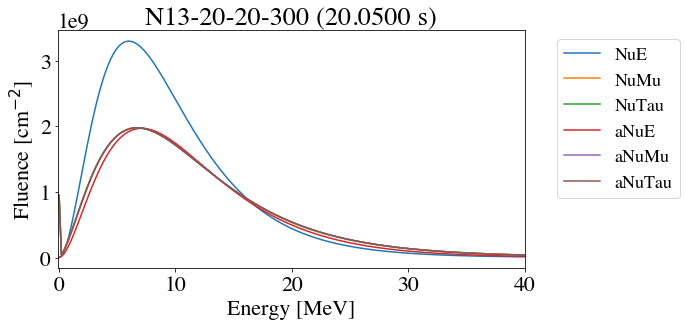

In [5]:
# fluences = pnut.get_fluences(sn)
beer.plot_fluences(sn)

## SNOwGLoBES processing

Use `snewpy` to run simulation fluences in `SNOwGLoBES`.

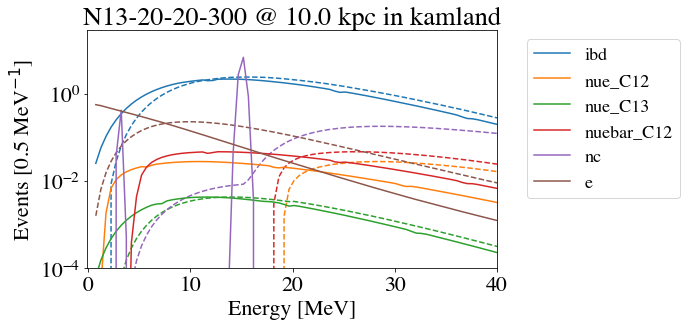

In [6]:
# snow_events = pnut.snowglobes_events(sn, detector)
beer.plot_snowglobes_events(sn, detector)

## sspike processing

Use fluences from `snewpy` to determine proton-neutrino elastic-scattering rates in `kamland`.

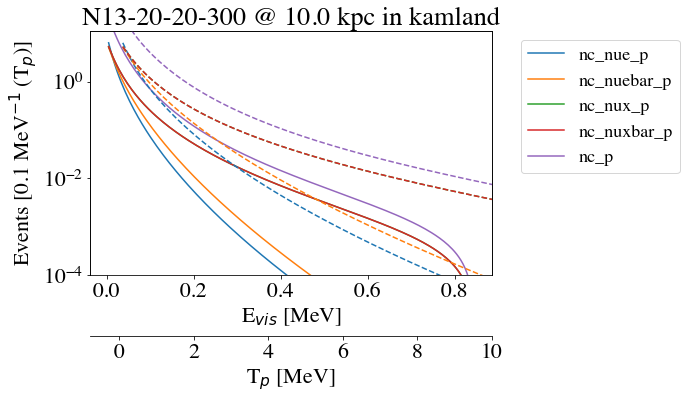

In [7]:
# sspike_events = pnut.sspike_events(sn, detector)
beer.plot_sspike_events(sn, detector)

## Event totals

Sum events by interaction channel.  Event types to process are set by `Detector`.

In [8]:
# totals = pnut.event_totals(sn, detector)
beer.bar_totals(sn, detector)

## Visible totals

Sub-set of all totals set by `Detector`.

### Bar graph

In [9]:
vis = pnut.vis_totals(sn, detector)
beer.bar_vis(sn, detector)

### DataFrame

Extra keys for comparing simulations.

In [10]:
vis

,model,mass,metal,t_rev,channel,events
0,Nakazato_2013,20,0.02,300,ibd,90.400511
1,Nakazato_2013,20,0.02,300,nue_C12,1.279816
2,Nakazato_2013,20,0.02,300,nue_C13,0.163539
3,Nakazato_2013,20,0.02,300,nuebar_C12,2.118525
4,Nakazato_2013,20,0.02,300,nc,10.867213
5,Nakazato_2013,20,0.02,300,e,7.759577
6,Nakazato_2013,20,0.02,300,nc_p,2.276566


## Rates by distance

Scale visible totals from 100 pc to 100 kpc.

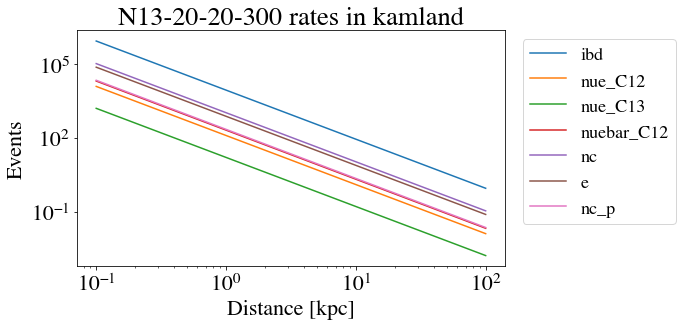

In [11]:
beer.plot_distance_rates(sn, detector)

## 500 ms time series

Pass simulation time parameters to `snewpy.snowglobes`.

- `t_bins`: number of equally spaced time bins.  Run 1 simulation for each.
- `t_start`: simulation start time.  Must be within model parameters.
- `t_end`: simulation end time.  Must be within model parameters.

In [12]:
t_bins = 20
t_start = 0.0
t_end = 0.50
sn2 = Supernova(model, progenitor, transformation, distance, t_bins, t_start, t_end)

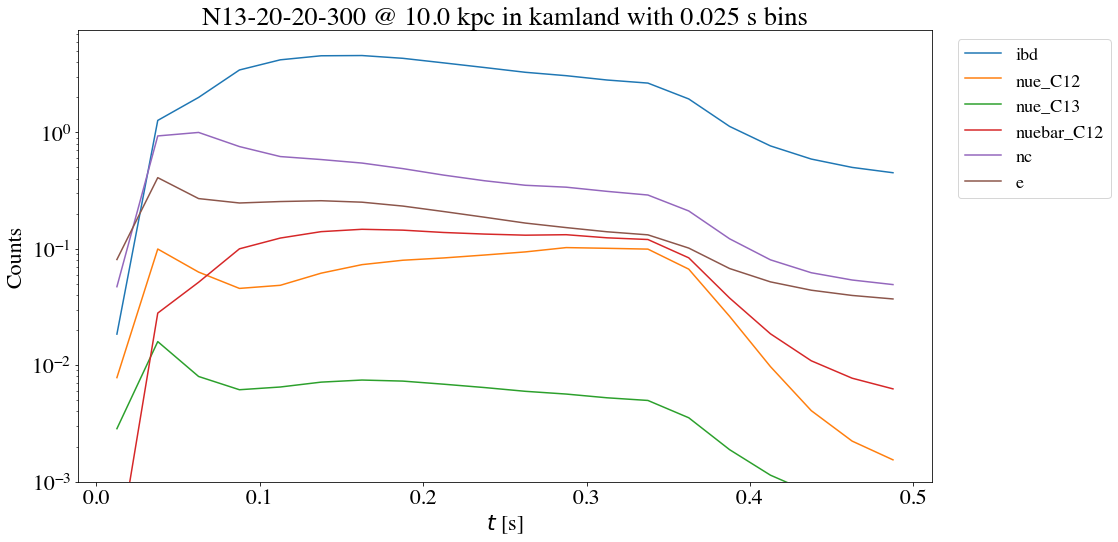

In [13]:
# counts = pnut.time_events(sn2, detector)
beer.plot_series(sn2, detector)

## Events by channel

Plot event rates for 1 channel: $N(E_i, t_i)$

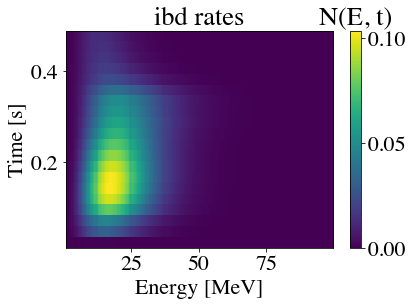

In [14]:
beer.plot_N_chan(sn2, detector, 'ibd')

## Random probabilities

Example of random DataFrame used for event generation.

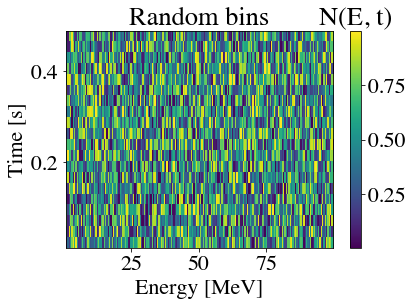

In [15]:
beer.plot_N_chan(sn2, detector, "random", save=False)

## Random Events

Use Poisson statistics to bin events.  Only accurate if probability for 2 events in 1 bin is negligible.

`chan` must be one of the processed channels for the given `Detector`.

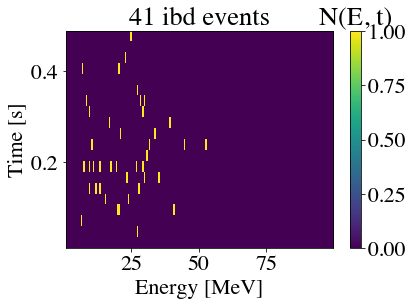

In [16]:
chan = 'ibd'
beer.plot_N_chan(sn2, detector, chan, events=True, save=False)

## 500 ms totals

Runs single bin simulation for comparison with number of random events.

In [17]:
sn3 = Supernova(model, progenitor, transformation, distance, 1, t_start, t_end)
snow = pnut.snowglobes_events(sn3, detector)
nc = pnut.sspike_events(sn3, detector)
tots = pnut.event_totals(sn3, detector)
vis = pnut.vis_totals(sn3, detector)
vis

,model,mass,metal,t_rev,channel,events
0,Nakazato_2013,20,0.02,300,ibd,49.214804
1,Nakazato_2013,20,0.02,300,nue_C12,1.158982
2,Nakazato_2013,20,0.02,300,nue_C13,0.104983
3,Nakazato_2013,20,0.02,300,nuebar_C12,1.680476
4,Nakazato_2013,20,0.02,300,nc,7.663611
5,Nakazato_2013,20,0.02,300,e,3.334571
6,Nakazato_2013,20,0.02,300,nc_p,2.189187


## 500 ms events by distance

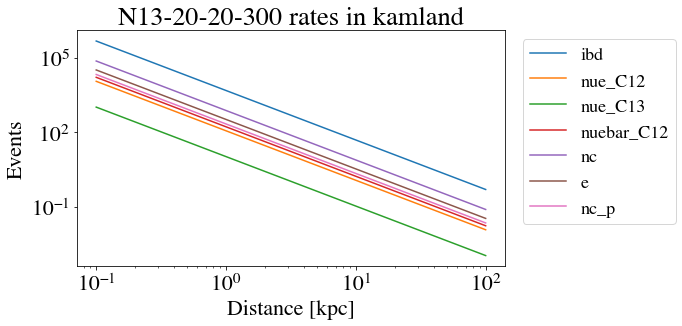

In [18]:
beer.plot_distance_rates(sn3, detector)